In [1]:
import pandas as pd
import warnings
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df_industries = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam-Industry.xlsx', index_col='Date')
df_market = pd.read_excel('/Users/ju/Projects/00_SMU/mqf_practice/QF600_Asset_Pricing/Exam/data/Exam–Market.xlsx', index_col='Date')
df = pd.merge(df_industries, df_market, left_index=True, right_index=True)
# df_risk_factors = pd.read_excel('./data/Risk_Factors.xlsx', index_col='Date')

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Using monthly excess returns for the five industry portfolios:

Use Monte Carlo simulation (with at least 105 data points) to find the minimum-variance frontier generated by the five industry portfolios, without short sales (or riskless asset). 

Plot your results with risk premium on the vertical axis, and standard deviation of (excess) return on the horizontal axis.



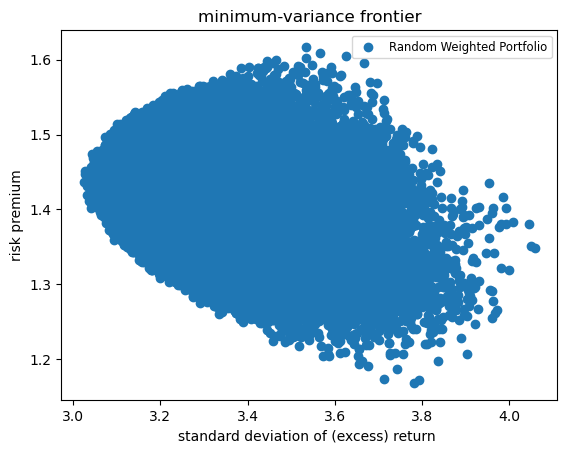

In [5]:
num_samples = 10**5
random_weights = np.random.rand(num_samples, 5)  # 10 random weights from 0 to 1 for each sample
# random_weights = generate_random_weights(num_samples, 10)  # 10 random weights from -1 to 1 for each sample 
w = random_weights / random_weights.sum(axis=1, keepdims=True)  # Normalize

# Calculate mean returns and covariance to obtain standard deviation for all samples
R_mvf = df_industries.mean().values
V_mvf = df_industries.cov().values
R_i = w @ R_mvf                                 # Expected returns
sig_i = np.sqrt(np.sum(w @ V_mvf * w, axis=1))  # Standard deviations

# Plot results
plt.xlabel("standard deviation of (excess) return ")     
plt.ylabel("risk premium")  
plt.title("minimum-variance frontier")  
plt.scatter(sig_i,R_i, label="Random Weighted Portfolio")
plt.legend(loc='upper right', fontsize='small')
plt.show()

Report the mean return and standard deviation of (excess) return for the simulated global-minimum-variance portfolio.


In [9]:
# minimum variance portfolio sigma and return
# left most portfolio
print(f"for the simulated global-minimum-variance portfolio.")
print(f"mean return {R_i[np.argmin(sig_i)]:.5f}% and standard deviation {np.min(sig_i):.5f}%")


for the simulated global-minimum-variance portfolio.
mean return 1.43687% and standard deviation 3.02475%



Briefly explain in words, without any mathematical notation or formulas:

Economic significance of indifference curves

Shape of indifference curves for a risk-averse investor

How a risk-averse investor can use indifference curves to find the optimal investment portfolio

---

Economic Significance of Indifference Curves

answer:
Indifference curves are a graphical representation of an investor's preferences between different levels of risk and return. They show combinations of risk and return that the investor considers equally desirable.   


Shape of Indifference Curves for a Risk-Averse Investor

answer: 
A risk-averse investor prefers less risk for a given level of return. Their indifference curves are upward-sloping and convex to the origin. This shape reflects the idea that as risk increases, the investor requires a higher level of return to compensate for the added risk.

How a Risk-Averse Investor Can Use Indifference Curves to Find the Optimal Investment Portfolio

answer: A risk-averse investor can use indifference curves to identify their optimal investment portfolio. By overlaying the investor's indifference curves onto a graph of available investment opportunities (often represented by the Capital Allocation Line), the investor can find the point where the highest indifference curve is tangent to the Capital Allocation Line. This point represents the portfolio that offers the highest level of utility (satisfaction) to the investor, given their risk tolerance and return expectations.
